<h1> Route Optimisation Through Centralised Control </h1>
<h2> Libraries </h2>

In [1]:
import os
import numpy as np
import sys
import math
import random
import networkx as nx
import copy
from collections import deque


modulenames = set(sys.modules) & set(globals())
mNames      = ("\n    ").join([name for name in modulenames])
print("Imported following modules:")
print("    " + mNames)

Imported following modules:
    math
    os
    copy
    sys
    random


<h2> Simple</h2>

In [11]:
def routeFinder(network, route):
    system = copy.copy(network)
    system.nodes[route[0]]["time"] = 0
    system.nodes[route[0]]["path"]  = [route[0]]
    
    nextNode = [route[0]]
    while nextNode != [] and nextNode[0] != route[1]:
        listRoutes(system, nextNode)
    if nextNode == []:
        raise Exception("Route not found")
    node = route[0]
    path = []     
    return system.nodes[route[1]]["path"], system.nodes[route[1]]["time"]

def listRoutes(system, nodes: list):
    node = nodes.pop(0)

    for destination, details in system[node].items():
        if "time" in system.nodes[destination]:
            if system.nodes[destination]["time"] <= system.nodes[node]["time"] + details["time"](details["traffic"]):
                continue
            
        system.nodes[destination]["time"] = system.nodes[node]["time"] + details["time"](details["traffic"])
        
        system.nodes[destination]["path"] = (list(system.nodes[node]["path"]))
        system.nodes[destination]["path"].append(destination)
        a = 0
        b = len(nodes) - 1
        while a < b:
            
            if system.nodes[nodes[int((a+b)/2)]]["time"] < system.nodes[destination]["time"]:
                a = int((a+b) / 2) + 1
            else:
                b = int((a+b) / 2)
            
        if  nodes == [] or system.nodes[nodes[int(a)]]["time"] > system.nodes[destination]["time"]:
            nodes.insert(int(a), destination)
        else:
            nodes.insert(int(a + 1), destination)





(['A', 'D', 'B', 'C'], 20.0)
(['B', 'C'], 10.0)


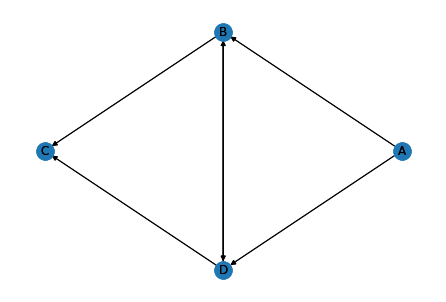

In [3]:
class Ex1:
    def times(self, i, j):
        inf = float("inf")
        time = lambda t: np.array([[inf, 20, inf, t/10],
                                [inf, inf, t/10, 0],
                                [inf, inf, inf, inf],
                                [inf, 0, 20, inf],])
        return lambda t: time(t)[i, j]

    def network(self, traffic, route = ("A", "C"), graph = False):
        ex1 = nx.DiGraph()

        towns = [chr(65+i) for i in range(4)]
        inf = float("inf")

        ex1.add_nodes_from(towns)
        for i, town1 in enumerate(towns):
            for j, town2 in enumerate(towns):
                time = self.times(i, j)
                if time(0) != inf:
                    ex1.add_edge(town1, town2, time = time, traffic = traffic)
        if graph == True:
            nx.draw_circular(ex1, with_labels = True)

        return routeFinder(ex1, route)

example1 = Ex1()

print(example1.network(100, ("A", "C"), True))
print(example1.network(100, ("B", "C"), True))

<h2> Example Case 2</h2>

<ipython-input-14-13a8f5e4712a>:9: RuntimeWarning: divide by zero encountered in true_divide
  return lambda t: self.time[i, j] / self.chance[i, j]


(['A', 'H', 'G', 'I', 'B', 'C'], 0.809331040304204)


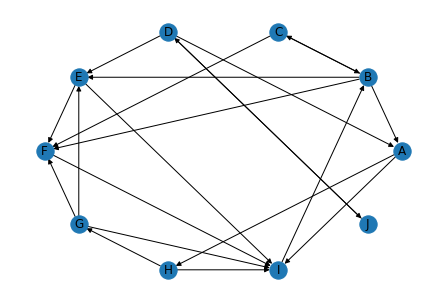

In [14]:
class Ex2:
    def __init__(self, nodes, trigger):
        self.towns = nodes
        self.chance = np.random.rand(nodes, nodes) > trigger
        self.time = np.random.rand(nodes, nodes)

    def times(self, i, j):
        inf = float("inf")
        return lambda t: self.time[i, j] / self.chance[i, j]

    def network(self, traffic, route = ("A", "C"), graph = False):
        ex1 = nx.DiGraph()

        towns = [chr(65+i) for i in range(self.towns)]
        inf = float("inf")

        ex1.add_nodes_from(towns)
        for i, town1 in enumerate(towns):
            for j, town2 in enumerate(towns):
                time = self.times(i, j)
                if time(0) != inf:
                    ex1.add_edge(town1, town2, time = time, traffic = traffic)
        if graph == True:
            nx.draw_circular(ex1, with_labels = True)

        return routeFinder(ex1, route)

example2 = Ex2(10, 0.7)
print(example2.network(100, ("A", "C"), True))

<h3> Visualisation </h3>

<ipython-input-14-13a8f5e4712a>:9: RuntimeWarning: divide by zero encountered in true_divide
  return lambda t: self.time[i, j] / self.chance[i, j]


(['F', 'I', 'B', 'A', 'H'], 1.600026257014818)


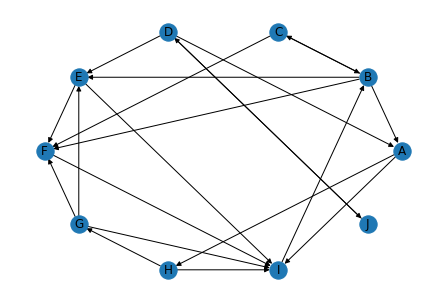

In [16]:
print(example2.network(100, ("F", "H"), True))